/tmp/ipykernel_50726/411015491.py:19: RuntimeWarning: invalid value encountered in sqrt
  pdf = (1/(2*np.pi*q*x)) * np.sqrt((lambda_max - x) * (x - lambda_min))


(0.0, 4.0)

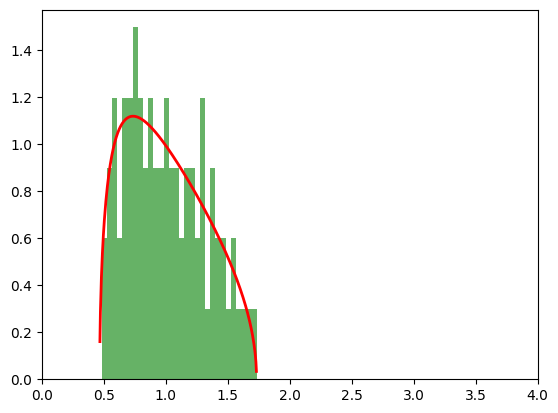

In [4]:
import numpy as np
T = 800
N = 80
R = np.random.randn(N,T)
R = R @ R.T  # make it symmetric and positive definite
C = R / T 

eigs = np.linalg.eigvalsh(C)
q = N / T
lambda_max = (1 + np.sqrt(q))**2
lambda_min = (1 - np.sqrt(q))**2

#stampa i tre più piccoli e i tre più grandi autovalori
lambda_min, lambda_max, eigs[:3], eigs[-3:]
import matplotlib.pyplot as plt
#plot della marchenko-pastur confrontata con l'istogramma degli autovalori
plt.hist(eigs, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(0.01, 4.0, 1000)
pdf = (1/(2*np.pi*q*x)) * np.sqrt((lambda_max - x) * (x - lambda_min))
plt.plot(x, pdf, 'r-', lw=2)
plt.xlim(0, 4) 



/tmp/ipykernel_50726/356516077.py:19: RuntimeWarning: invalid value encountered in sqrt
  pdf = (1/(2*np.pi*q*x)) * np.sqrt((lambda_max - x) * (x - lambda_min))


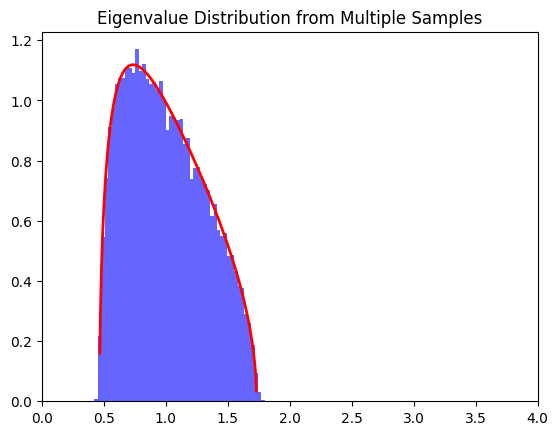

In [5]:
#costruisco ensemble di matrici di covarianza casuali
def random_covariance_matrix(N, T):
    R = np.random.randn(N, T)
    R = R @ R.T  # make it symmetric and positive definite
    C = R / T 
    return C
def sample_eigenvalues(N, T, num_samples):
    eigenvalues = []
    for _ in range(num_samples):
        C = random_covariance_matrix(N, T)
        eigs = np.linalg.eigvalsh(C)
        eigenvalues.extend(eigs)
    return np.array(eigenvalues)
num_samples = 100
eigenvalues = sample_eigenvalues(N, T, num_samples)

plt.hist(eigenvalues, bins=50, density=True, alpha=0.6, color='b')
x = np.linspace(0.01, 4.0, 1000)
pdf = (1/(2*np.pi*q*x)) * np.sqrt((lambda_max - x) * (x - lambda_min))
plt.plot(x, pdf, 'r-', lw=2)
plt.title('Eigenvalue Distribution from Multiple Samples')
plt.xlim(0, 4)
plt.show()

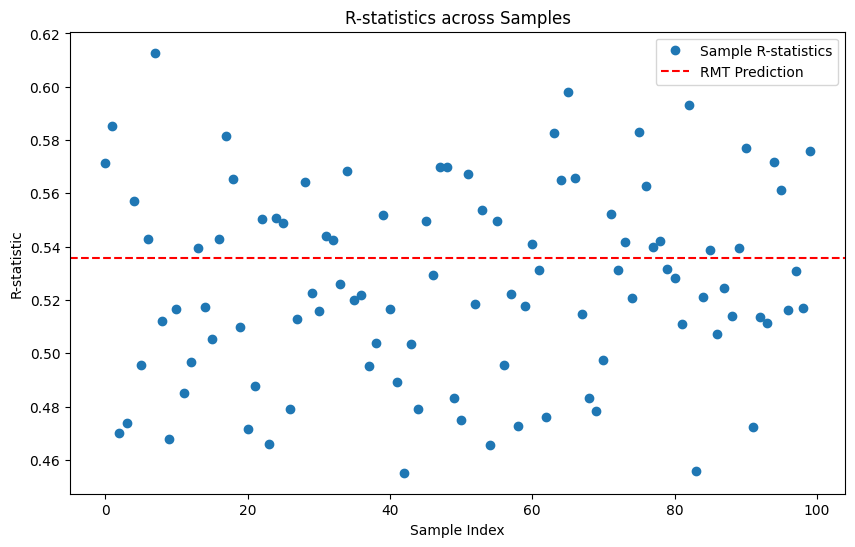

la media delle R-statistics campionate è: 0.5279267291203846


In [19]:
import sys
sys.path.append("../src")
from finrmt.spectra import r_statistics

def sample_eigenvalues(N, T, num_samples):
    results = []
    for _ in range(num_samples):
        C = random_covariance_matrix(N, T)
        eigs = np.linalg.eigvalsh(C)
        eigs.sort()  # ordina solo gli autovalori della matrice corrente
        r = r_statistics(eigs)
        results.append(r)
    return results

num_samples = 100
N = 80
T = 800
plt.figure(figsize=(10, 6))
plt.plot(sample_eigenvalues(N, T, num_samples), 'o', label='Sample R-statistics')
plt.axhline(y=0.53590, color='r', linestyle='--', label='RMT Prediction')
plt.title('R-statistics across Samples')
plt.xlabel('Sample Index')
plt.ylabel('R-statistic')
plt.legend()
plt.show()
print("la media delle R-statistics campionate è:", np.mean(sample_eigenvalues(N, T, num_samples)))